In [503]:
# limit for 2 tag
import ROOT as rt
import math
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from limit_plots import *
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()

print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [504]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees_obs =OrderedDict()
dataCards_obs = OrderedDict()
limitTrees_hybridNew = OrderedDict()

version = '/V1p17/v2/v163/'
dc_version = 'v9'

nrechit = 100

mode = 'allProd_withggZH'
decay = '4Tau'
decay = 'dddd'
decay = 'bbbb'

samples = [
# 'allProd_withggZH_HToSS_SToEE_ms4p0',
'allProd_withggZH_HToSS_SToEE_ms0p4',
'allProd_withggZH_HToSS_SToGammaGamma_ms0p4',
# 'allProd_withggZH_HToSS_SToGammaGamma_ms4p0',
'allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5',
'allProd_withggZH_HToSS_SToK0K0_ms1p5',
'allProd_withggZH_HToSS_SToPi0Pi0_ms0p4',
'allProd_withggZH_HToSS_SToPi0Pi0_ms1p0',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0',
# 'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms4p0',
'allProd_withggZH_HToSS_STodd_ms3p0',
'allProd_withggZH_HToSS_STodd_ms7',
'allProd_withggZH_HToSS_STodd_ms15',
'allProd_withggZH_HToSS_STodd_ms40',
'allProd_withggZH_HToSS_STodd_ms55',
'allProd_withggZH_HToSS_SToTauTau_ms7',
'allProd_withggZH_HToSS_SToTauTau_ms15',
'allProd_withggZH_HToSS_SToTauTau_ms40',
'allProd_withggZH_HToSS_SToTauTau_ms55',
'allProd_withggZH_HToSS_SToBB_ms15',
'allProd_withggZH_HToSS_SToBB_ms40',
'allProd_withggZH_HToSS_SToBB_ms55'
]


methodA = False
unblind = 'unblindABC'
hybridNew = 0
category = '/all_cat/'

# category = '/csc_twotag/'

limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'


lumi = 137000
nCsc = 100
nDt = 80

ctaus = np.array([0.1, 0.125, 0.15, 0.175, 0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9, 1,1.25, 1.5, 1.75, 2,2.25,2.5,2.75,3,3.25,3.5,3.75, 4,5, 6,7,8,9,10, 11,12,13,14,15, 16,17,18,19,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 125, 150, 175, 200, 225, 250, 275, 300,325, 350, 375, 400, 425, 450, 475, 500, \
                  600,700,800, 900, 1000, 1250, 1500, 1750, 2000,2250, 2500, 2750, \
                  3000, 3250, 3500, 3750, 4000, 5000, 6000, 7000, 8000, 9000,\
                  10000, 15000, 20000, 30000, 100000,int(2e5),int(3e5),\
                        int(2e6),int(3e6),int(5e6),int(1e7)]) #v12


if decay == 'bbbb': mass = np.array([ 15, 40, 55])
else:mass = np.array([ 7, 15, 40, 55])

### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
expected = ['0.025', '0.160','0.500','0.840','0.975']


for m in samples:
    limitTrees[m] = {}
    dataCards[m] = {}
    limitTrees_hybridNew[m] = {}
    for ct in ctaus:
        name = mode+'_HToSSTo'+decay
#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.txt'
#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         if hybridNew:
#             limitTrees[m][ct] = []
#             for i in range(6):
#                 if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.root')
#                 else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')

#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        ct_str = str(ct).replace('.','p')
        if ct == int(ct):ct_str = str(int(ct)).replace('.','p')
        else: ct_str = str(ct).replace('.','p')
        dataCards[m][ct] = dataCardDir + '/'+unblind+category+m+'_ctau'+ct_str+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+m+'_ctau'+ct_str+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'

#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
        if hybridNew:
            limitTrees[m][ct] = []
            for i in range(6):
                if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.root')
                else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')


norms = []
limits = {}
for i,m in enumerate(limitTrees.keys()):
    if unblind == 'blind' or unblind == 'unblindABC': limits[m] = np.ones((len(ctaus), 5))*1000000
    else:limits[m] = np.ones((len(ctaus), 6))*1000000
    for j, k in enumerate(limitTrees[m].keys()):
#         if not os.path.isfile(dataCards[m][k]):continue

#         if not os.path.isfile(limitTrees[m][k]):continue

        line = open(dataCards[m][k], "r").readline()
        if not line.split(" ")[0] == '#' :continue
        signal_norm = float(line.split(" ")[3])
        
        if signal_norm == 0:continue
        if hybridNew:
            for n in range(6):
                if len(uproot.open(limitTrees[m][k][n]).keys()) == 2:
                    T = uproot.open(limitTrees[m][k][n])['limit']
                    if len(np.array(T.array('limit'))>0):limits[m][j][n] = np.array(T.array('limit'))/signal_norm
                
        else:
            if len(uproot.open(limitTrees[m][k]).keys()) == 2:
                T = uproot.open(limitTrees[m][k])['limit']                
                if len(np.array(T.array('limit'))>0):limits[m][j] = np.array(T.array('limit'))/signal_norm
    limits[m] = np.array(limits[m])

print(ctaus)



[1.00e-01 1.25e-01 1.50e-01 1.75e-01 2.00e-01 2.50e-01 3.00e-01 3.50e-01
 4.00e-01 5.00e-01 6.00e-01 7.00e-01 8.00e-01 9.00e-01 1.00e+00 1.25e+00
 1.50e+00 1.75e+00 2.00e+00 2.25e+00 2.50e+00 2.75e+00 3.00e+00 3.25e+00
 3.50e+00 3.75e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00
 1.00e+01 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01
 1.80e+01 1.90e+01 2.00e+01 2.50e+01 3.00e+01 3.50e+01 4.00e+01 4.50e+01
 5.00e+01 5.50e+01 6.00e+01 6.50e+01 7.00e+01 7.50e+01 8.00e+01 8.50e+01
 9.00e+01 9.50e+01 1.00e+02 1.25e+02 1.50e+02 1.75e+02 2.00e+02 2.25e+02
 2.50e+02 2.75e+02 3.00e+02 3.25e+02 3.50e+02 3.75e+02 4.00e+02 4.25e+02
 4.50e+02 4.75e+02 5.00e+02 6.00e+02 7.00e+02 8.00e+02 9.00e+02 1.00e+03
 1.25e+03 1.50e+03 1.75e+03 2.00e+03 2.25e+03 2.50e+03 2.75e+03 3.00e+03
 3.25e+03 3.50e+03 3.75e+03 4.00e+03 5.00e+03 6.00e+03 7.00e+03 8.00e+03
 9.00e+03 1.00e+04 1.50e+04 2.00e+04 3.00e+04 1.00e+05 2.00e+05 3.00e+05
 2.00e+06 3.00e+06 5.00e+06 1.00e+07]


# Expected Limit only (blinded)

EE 0.01 15
50
80
50 80
ERROR: no curve drawn for contour 1 
GammaGamma 0.01 15
50
80
50 80
ERROR: no curve drawn for contour 1 
KPlusKMinus 1 15
50
80
50 80
K0K0 1 15
50
80
50 80
Pi0Pi0 0.3 15
50
80
50 80
ERROR: no curve drawn for contour 1 
PiPlusPiMinus 0.31 15
50
80
50 80
dd 0.01 15
50
80
50 80
TauTau 4 15
50
80
50 80
ERROR: no curve drawn for contour 1 
BB 9 15
49
80
50 80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v163//v9/unblindABC/allProd_withggZH_HToSSToEE_2d_expected.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christi

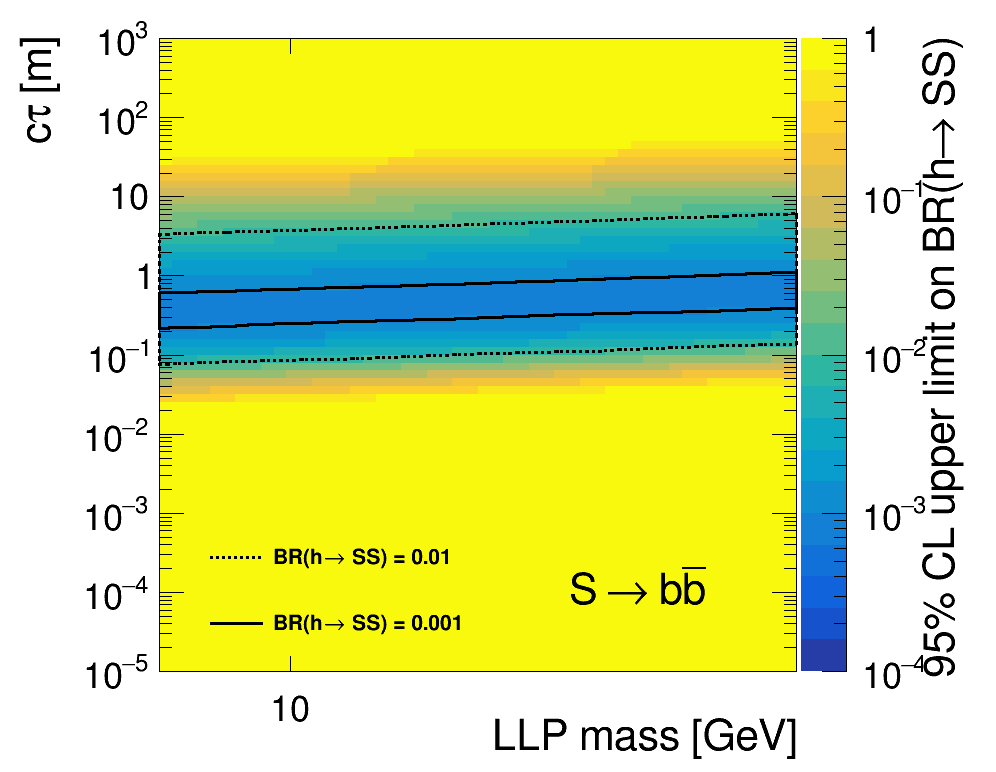

In [87]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']

opac_1sig = 0.25
opac_2sig = 0.1
for decay in decays:
#     if not decay == 'PiPlusPiMinus':continue
#     print(decay)
#     leg = rt.TLegend(0.48,0.15,0.75,0.32)

    leg = rt.TLegend(0.2,0.15,0.5,0.32)

    leg.SetFillStyle(0)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    rt.gStyle.SetLegendFillColor(1)
    leg.SetEntrySeparation(0.01)
#     leg2.SetTextSize(0.032)
#     leg2.SetBorderSize(0)
#     leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 1000, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
#     print(ctaus_m)
#     h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','log10(c#tau)',''], binning = [300,0,30,100,-4,3])
    sample_temp = []
    m_sample = []
    x = array('d',[])
    y = array('d',[])
    z = array('d',[])
    for m in samples:
        if decay in m:
            m_sample.append(float(m[m.find('ms')+2:].replace('p','.')))
            sample_temp.append(m)
    ### set min and max mass range
#     if decay == 'dd' or decay == 'TauTau' or decay == 'BB': max_mass = 15
#     elif decay == 'EE' or decay == 'GammaGamma': max_mass = 1
#     elif 'K' in decay or 'Pi' in decay: max_mass = 4
    
#     else: max_mass = np.max(m_sample)
    max_mass = 15    
    if decay == 'dd': min_mass = 0.01 # mass is 0.0047 GeV
    elif decay == 'BB': min_mass = 9 # mass is 4.18 GeV
    elif decay == 'TauTau': min_mass = 4 # mass is 1.77 GeV
    elif decay == 'EE': min_mass = 0.01 # mass is 0.511 MeV
    elif decay == 'GammaGamma': min_mass = 0.01 
    elif decay == 'KPlusKMinus': min_mass = 1 # mass is 0.493 GeV
    elif decay == 'K0K0': min_mass = 1 # mass is 0.497 GeV
    elif decay == 'Pi0Pi0': min_mass = 0.3 # mass is 0.134 GeV
    elif decay == 'PiPlusPiMinus': min_mass = 0.31 # mass is 0.139 GeV

    print(decay, min_mass, max_mass)
    h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                    binning = [50,math.log10(min_mass),math.log10(max_mass),80,-5,3])

    for logm in np.arange(-3,2,0.1):
        m = 10.0**float(logm)
        if m >40 and m <55:continue
        if m == 0:continue
        use_m_s = 0.0
        if m>np.max(m_sample): 
            use_m_s = np.max(m_sample)
            index = np.argmax(m_sample)
        else:
            for i, m_s in enumerate(m_sample):
                if m <= m_s:
                    use_m_s = m_s
                    index = i
                    break
        cond = limits[sample_temp[index]][:,2] < 10000
        if decay == 'EE':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.001))
        if decay == 'Pi0Pi0':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        if decay == 'PiPlusPiMinus':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.003))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        for j in range(len(ctaus_m[cond])):
            if ctaus_m[cond][j]/1.0*use_m_s*m == 0.0:continue
#             print(m, float(m))
            x.append(math.log10(float(m)))
            y.append(math.log10(ctaus_m[cond][j]/use_m_s*m))
            z.append(math.log10(limits[sample_temp[index]][:,2][cond][j]))
#             print(x,y,z)
#             print(m, use_m_s, ctaus_m[cond][j], ctaus_m[cond][j]/1.0*use_m_s*m)
#             h.SetBinContent(h.GetXaxis().FindBin(float(m)), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
            h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/1.0*use_m_s*m)),limits[sample_temp[index]][:,2][cond][j])
#     #     print(x,y,z)
    h = interpolate2D(x,y,z, h, 0.2,1)
    
    tdrstyle.setTDRStyle()
    
    
    
        
    #############
    # plot contour
    #############

    contours = array('d',[0.001, 0.01])
    hframed = frameTH2D(h)
#     hframed = h.Clone()

    hframed = log_scale_conversion(hframed)
    hframed.SetContour(len(contours),contours)
    hframed.SetMaximum(1)
    hframed.SetMinimum(0.0001)
    hframed.Draw("CONT Z LIST")

    rt.gPad.Update()

    h = log_scale_conversion(h)
    h.SetMinimum(1e-4)
    h.SetMaximum(1) 
    h.Draw('colz')

    
    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    cont_gr = []
    for i in range(conts.GetSize()):
        contour0 = conts.At(i)
        curv = contour0.First()
        finalcurv = rt.TGraph(1)
#         print(contours_plotted)
        try:
            curv.SetLineWidth(3)
            curv.SetLineColor(std_color_list[0])
            curv.SetLineStyle(std_color_list[i])

            curv.Draw("lsame")
            finalcurv = curv.Clone()
            maxN = curv.GetN()
            for i in range(1, contour0.GetSize()):
                curv = contour0.After(curv)
                curv.SetLineWidth(3)
                curv.SetLineColor(rt.kBlack)
                curv.Draw("lsame")
                if curv.GetN()>maxN:
                    maxN = curv.GetN()
                    finalcurv = curv.Clone()
            cont_gr.append(finalcurv)
        except AttributeError:
            print ("ERROR: no curve drawn for contour %s "%(i))
    for idex in range(len(cont_gr)):
        i = len(cont_gr)-idex-1
        leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[len(contours)-idex-1]), 'L')
        finalcurv.Draw('lsame')



    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)

    if decay == 'dd': latex.DrawLatex(max_mass/10,0.00007,  "S #rightarrow d#bar{d}")
    elif decay == 'BB': latex.DrawLatex(max_mass/1.2,0.00007, "S #rightarrow b#bar{b}")
    elif decay == 'TauTau': latex.DrawLatex(max_mass/1.5,0.00007, "S #rightarrow #tau^{+}#tau^{-}")
    elif decay == 'EE': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow e^{+}e^{-}")
    elif decay == 'GammaGamma': latex.DrawLatex(max_mass/10,0.00007, "S #rightarrow #gamma#gamma")
    elif decay == 'KPlusKMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{+}K^{-}")
    elif decay == 'K0K0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow K^{0}K^{0}")
    elif decay == 'Pi0Pi0': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{0}#pi^{0}")
    elif decay == 'PiPlusPiMinus': latex.DrawLatex(max_mass/3,0.00007, "S #rightarrow #pi^{+}#pi^{-}")

    leg.Draw()
    
    c.SetRightMargin(0.2)
    c.SetLogz()
    c.SetLogx()
    c.SetLogy()
    


    c.Draw()
    

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay


#     print(name)
    c.SaveAs(name+'_2d_expected.png')
    c.SaveAs(name+'_2d_expected.C')
    c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()


# scale limit by BR

{'EE': [0.4], 'GammaGamma': [0.4], 'KPlusKMinus': [1.5], 'K0K0': [1.5], 'Pi0Pi0': [0.4, 1.0], 'PiPlusPiMinus': [0.4, 1.0], 'dd': [3.0, 7.0, 15.0, 40.0, 55.0], 'TauTau': [7.0, 15.0, 40.0, 55.0], 'BB': [15.0, 40.0, 55.0]}
{'EE': ['0p4'], 'GammaGamma': ['0p4'], 'KPlusKMinus': ['1p5'], 'K0K0': ['1p5'], 'Pi0Pi0': ['0p4', '1p0'], 'PiPlusPiMinus': ['0p4', '1p0'], 'dd': ['3p0', '7', '15', '40', '55'], 'TauTau': ['7', '15', '40', '55'], 'BB': ['15', '40', '55']}
allProd_withggZH_HToSS_SToEE_ms0p4 0p4 0.4
allProd_withggZH_HToSS_SToTauTau_ms40 40 40.0
allProd_withggZH_HToSS_STodd_ms40 40 40.0
allProd_withggZH_HToSS_STodd_ms40 40 40.0
allProd_withggZH_HToSS_SToBB_ms40 40 40.0
allProd_withggZH_HToSS_STodd_ms40 40 40.0
allProd_withggZH_HToSS_SToEE_ms0p4 0p4 0.4
allProd_withggZH_HToSS_SToTauTau_ms7 7 7.0
allProd_withggZH_HToSS_STodd_ms7 7 7.0
allProd_withggZH_HToSS_STodd_ms7 7 7.0
allProd_withggZH_HToSS_STodd_ms7 7 7.0
allProd_withggZH_HToSS_SToEE_ms0p4 0p4 0.4
allProd_withggZH_HToSS_SToPiPlusPiMinus

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


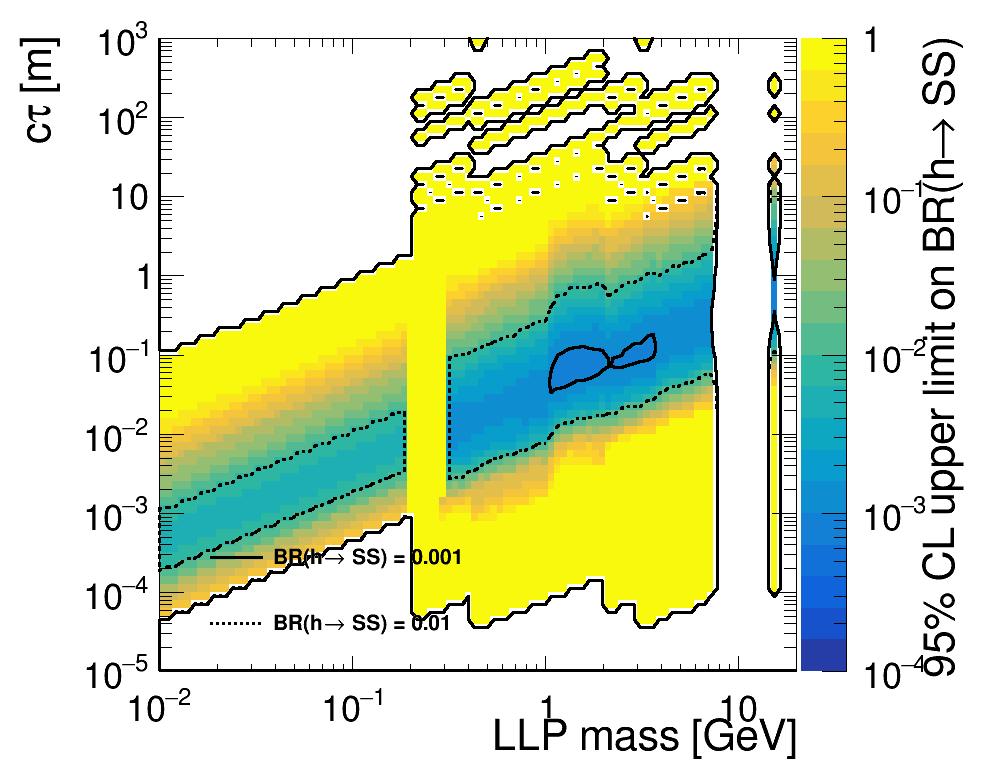

In [509]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']
pid = [11, 22,321,311,111,211,1,15,5]
mass = {}
mass_string = {}
for d in decays:
    mass[d] = []
    mass_string[d] = []
    for s in samples:
        if d in s:
            mass[d].append(float(s[s.find('ms')+2:].replace('p','.')))
            mass_string[d].append(s[s.find('ms')+2:])
print(mass)
print(mass_string)
opac_1sig = 0.25
opac_2sig = 0.1

leg = rt.TLegend(0.2,0.15,0.5,0.32)

leg.SetFillStyle(0)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
rt.gStyle.SetLegendFillColor(1)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 1000, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000

sample_temp = []
m_sample = []
x = array('d',[])
y = array('d',[])
z = array('d',[])
x_low = array('d',[])
y_low = array('d',[])
z_low = array('d',[])
max_mass = 20    
min_mass = 0.01

h = create_TH2D(np.column_stack((np.array(0), np.array(0))), axis_title = ['LLP mass [GeV]','c#tau [m]','95% CL upper limit on BR(h#rightarrow SS)'], \
                binning = [100,math.log10(min_mass),math.log10(max_mass),80,-5,3])

br_path = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/branchingRatio_phi/'
# import required module
h_mass = {}
for filename in os.listdir(br_path): # loop over mass points from 0.1 to 40 GeV
    f = os.path.join(br_path, filename)
    if os.path.isfile(f) and '.txt' in filename and filename[:3] == 'phi':
        m = float(filename[4:-4].replace('dot', '.'))
#         if not round(m,1) == m and m > 1.0:
#             print(m)
#             continue
#         if m >40 and m <55:continue
        if m == 0:continue
        if m <= 0.2:continue # use just EE for below 0.2
            
        
        br = []
        decay = []
        total_limits = np.array([])
        with open(f) as fi:
            lines = fi.readlines()
            for i_line,line in enumerate(lines): #loop over all decays
                if not '9000006:addChannel' in line:continue
                br_line = line[line.find('=')+2:].split(" ")
#                 print(i_line,line)
                assert(abs(float(br_line[3])) == abs(float(br_line[4])))
                if abs(float(br_line[3])) == 13:continue
                if abs(float(br_line[3])) == 3 or abs(float(br_line[3])) == 4 or abs(float(br_line[3])) == 21:
                    decay.append(1)
                else:decay.append(abs(float(br_line[3])))
                br.append(float(br_line[1]))
                if decay[-1] not in pid:print('PARTICLE NOT FOUND', br_line[3])
        
                # find which mass to use
                use_m_s = 0.0
                list_of_m = mass[decays[pid.index(decay[-1])]]
                if m>np.max(list_of_m): 
                    use_m_s = np.max(list_of_m)
                    index = np.argmax(list_of_m)
                else:
                    for i, m_s in enumerate(list_of_m):
                        if m <= m_s:
                            use_m_s = m_s
                            index = i
                            break
                # find sample corresponding to the mass and decay mode
                sample_name = 'allProd_withggZH_HToSS_STo'+decays[pid.index(decay[-1])]+'_ms'+mass_string[decays[pid.index(decay[-1])]][index]
                assert(sample_name in samples)
                print(sample_name, mass_string[decays[pid.index(decay[-1])]][index], use_m_s)
#                 if 'Pi0' in sample_name and '0p4' in sample_name:print(m)
                if len(total_limits) == 0:
                    x += array('d', [math.log10(float(m))]*len(ctaus_m))
                    y += array('d', np.log10(ctaus_m/use_m_s*m))
                    total_limits = 1./limits[sample_name][:,2]*br[-1]
                else:
                    total_limits += 1./limits[sample_name][:,2]*br[-1]
                
#             if np.min(1./total_limits)<0.001: print(m,np.min(1./total_limits))
            total_limits = np.log10(1./total_limits)
#             total_limits = 1./total_limits

            for j in range(len(ctaus_m)):
#                     if 'Pi0' in sample_name and '0p4' in sample_name:print(ctaus_m[j], ctaus_m[j]/use_m_s*m, h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)))
                    h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[j]/use_m_s*m)),\
                                    10**(total_limits[j]))
#                     print(10**(total_limits[j]))
            z += array('d', list(total_limits))
        
        
        
for logm in np.arange(-2,math.log10(0.2),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))            
    cond = np.logical_and(cond, ctaus_m > 0.002)

    
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),limits[sample_name][:,2][cond][j])

for logm in np.arange(math.log10(0.2),math.log10(0.3),0.01):
    m = 10.0**float(logm)
    
    sample_name = 'allProd_withggZH_HToSS_SToEE_ms0p4' #always decay to EE
#     2--> 0.4
    cond = np.logical_and(limits[sample_name][:,2] < 20, np.logical_not(ctaus_m==0.001))       
    cond = np.logical_and(cond, ctaus_m > 0.002)
#     print(ctaus_m[cond])
#     print(limits[sample_name][:,2][cond])
    x += array('d', [math.log10(float(m))]*len(ctaus_m[cond]))
    y += array('d', np.log10(ctaus_m[cond]/0.4*m))
    z += array('d', np.log10(limits[sample_name][:,2][cond]/0.001))
#     z += array('d', limits[sample_name][:,2][cond])
    for j in range(len(ctaus_m[cond])):
        h.SetBinContent(h.GetXaxis().FindBin(math.log10(float(m))), h.GetYaxis().FindBin(math.log10(ctaus_m[cond][j]/0.4*m)),1000*limits[sample_name][:,2][cond][j])

        
print(limits[sample_name][:,2][cond])

print(len(x), len(y), len(z))

# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'linear', norm = 'seuclidean')
x = array('d', [])
y = array('d', [])
z = array('d', [])
for i in range(1, h.GetNbinsX()+1):
    for j in range(1, h.GetNbinsY()+1):
        if not math.isnan(h.GetBinContent(i,j)) and not h.GetBinContent(i,j) == 0:
            x.append(h.GetXaxis().GetBinCenter(i))
            y.append(h.GetYaxis().GetBinCenter(j))
            z.append(math.log10(h.GetBinContent(i,j)))


# # h = interpolate2D(x,y,z, h, 0.02,0.5, inter = 'rbf', norm = 'seuclidean')
# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'seuclidean')

# 
# h = interpolate2D(x,y,z, h, 0.02,0, inter = 'rbf', norm = 'euclidean')

tdrstyle.setTDRStyle()




# #############
# # plot contour
# #############

contours = array('d',[ 0.001, 0.01])
hframed = frameTH2D(h)
hframed = log_scale_conversion(hframed)
hframed.SetContour(len(contours),contours)
hframed.SetMaximum(1)
hframed.SetMinimum(0.0005)
hframed.Draw("CONT Z LIST")

rt.gPad.Update()

h = log_scale_conversion(h)
h.SetMinimum(1e-4)
h.SetMaximum(1) 
h.Draw('colz')

conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
cont_gr = []
print(conts.GetSize())
for i in range(conts.GetSize()):
#     cont_gr[i] = []
    contour0 = conts.At(i)
    curv = contour0.First()
    finalcurv = rt.TGraph(1)
    print(contour0.GetSize())
    try:
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        finalcurv = curv.Clone()
        maxN = curv.GetN()
    except AttributeError:
        print ("ERROR: no curve drawn for contour %s "%(i))
    for j in range(1, contour0.GetSize()):
        curv = contour0.After(curv)
        curv.SetLineWidth(3)
        curv.SetLineColor(std_color_list[0])
        if i == 0:curv.SetLineStyle(1)
        else: curv.SetLineStyle(2)
        curv.Draw("lsame")
        if curv.GetN()>maxN:
            maxN = curv.GetN()
            finalcurv = curv.Clone()
    cont_gr.append(finalcurv)
print(len(cont_gr))
for i in range(len(cont_gr)):
    leg.AddEntry(cont_gr[i],'BR(h#rightarrow SS) = '+str(contours[i]), 'L')


leg.Draw()

c.SetRightMargin(0.2)

c.SetLogz()
c.SetLogx()
c.SetLogy()



c.Draw()


# output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
# if not os.path.isdir(output_dir):os.makedirs(output_dir)
# name = output_dir+mode+'_HToSSTo'+decay


# #     print(name)
# c.SaveAs(name+'_2d_expected.png')
# c.SaveAs(name+'_2d_expected.C')
# c.SaveAs(name+'_2d_expected.pdf')

#     tdrstyle.setTDRStyle()
#     c.Draw()
